In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from EDPRmodel5C import *
from solve_EDPRmodel5C import solve_EDPRmodel
from scipy.signal import find_peaks

%matplotlib inline

start_time = time.time()

t_dur = 90     # [s]
alpha = 2.0
I_stim =  4e-11 # [A]
stim_start = 5 # [s]
stim_end = 85  # [s]

sol = solve_EDPRmodel(t_dur, alpha, I_stim, stim_start, stim_end, protocol='ICS')

Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, \
    Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, n, h, s, c, q, z = sol.y
t = sol.t

my_cell = EDPRmodel(309.14, Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, alpha, 0, Ca_si[0], Ca_di[0], n, h, s, c, q, z)

phi_si, phi_se, phi_di, phi_de, phi_ex, phi_sm, phi_dm = my_cell.membrane_potentials(I_stim=0)


q_si = my_cell.total_charge([my_cell.Na_si[-1], my_cell.K_si[-1], my_cell.Cl_si[-1], my_cell.Ca_si[-1], my_cell.X_si[-1]], my_cell.V_si)
q_se = my_cell.total_charge([my_cell.Na_se[-1], my_cell.K_se[-1], my_cell.Cl_se[-1], my_cell.Ca_se[-1], my_cell.X_se[-1]], my_cell.V_se)        
q_di = my_cell.total_charge([my_cell.Na_di[-1], my_cell.K_di[-1], my_cell.Cl_di[-1], my_cell.Ca_di[-1], my_cell.X_di[-1]], my_cell.V_di)
q_de = my_cell.total_charge([my_cell.Na_de[-1], my_cell.K_de[-1], my_cell.Cl_de[-1], my_cell.Ca_de[-1], my_cell.X_de[-1]], my_cell.V_de)
q_ex = my_cell.total_charge([my_cell.Na_ex[-1], my_cell.K_ex[-1], my_cell.Cl_ex[-1], my_cell.Ca_ex[-1], my_cell.X_ex[-1]], my_cell.V_ex)
print("Final values")
print("----------------------------")
print("total charge at the end (C): ", q_si + q_se + q_di + q_de)
print("Q_si (C):", q_si)
print("Q_se (C):", q_se)
print("Q_di (C):", q_di)
print("Q_de (C):", q_de)
print("Q_ex (C):", q_ex)
print("----------------------------")
print('elapsed time: ', round(time.time() - start_time, 1), 'seconds')

----------------------------
Initial values
----------------------------
initial total charge(C):  0.0
Q_si (C): -1.2566400000000272e-12
Q_se (C): 1.2566400000000272e-12
Q_di (C): -1.2566400000000272e-12
Q_de (C): 1.2566400000000272e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
potentials [mV]
phi_ex:  0
phi_si:  -68
phi_se:  0
phi_di:  -68
phi_de:  0
phi_sm:  -68
phi_dm:  -68
E_Na_s:  55.0
E_Na_d:  55.0
E_K_s:  -84.0
E_K_d:  -84.0
E_Cl_s:  -79.0
E_Cl_d:  -79.0
E_Ca_s:  124.0
E_Ca_d:  124.0
----------------------------
Final values
----------------------------
total charge at the end (C):  -7.389794909033634e-21
Q_si (C): -1.29354983084857e-12
Q_se (C): 1.2935498286879797e-12
Q_di (C): -1.2933615057650358e-12
Q_de (C): 1.2933615005358312e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
elapsed time:  937.1 seconds


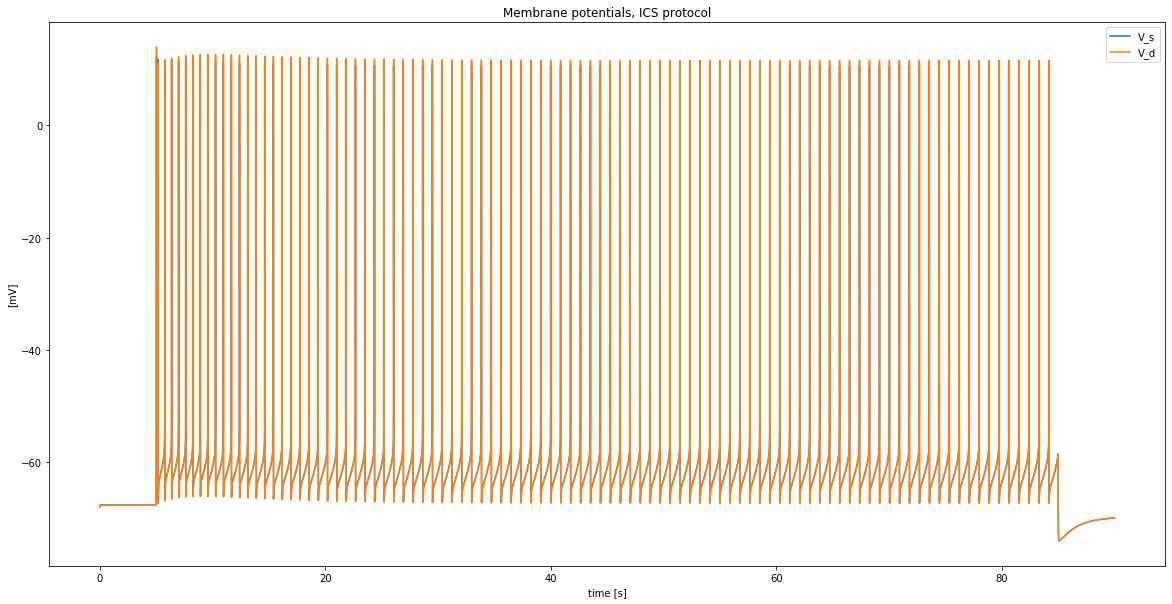

In [2]:
plt.figure(figsize=(20,10))
plt.plot(t, phi_sm*1000, '-', label='V_s')
plt.plot(t, phi_dm*1000, '-', label='V_d')
plt.title('Membrane potentials, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mV]')
plt.legend(loc='upper right')

plt.show()

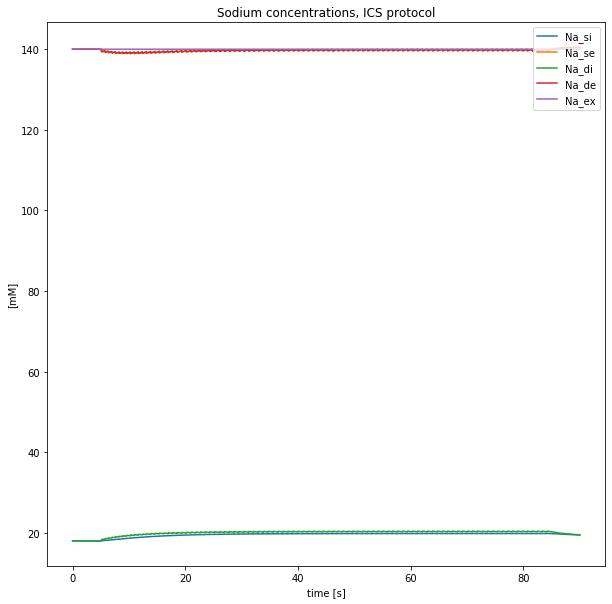

In [3]:
plt.figure(figsize=(10,10))
plt.plot(t, my_cell.Na_si, '-', label='Na_si')
plt.plot(t, my_cell.Na_se, '-', label='Na_se')
plt.plot(t, my_cell.Na_di, '-', label='Na_di')
plt.plot(t, my_cell.Na_de, '-', label='Na_de')
plt.plot(t, my_cell.Na_ex, '-', label='Na_ex')
plt.title('Sodium concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='upper right')

plt.show()

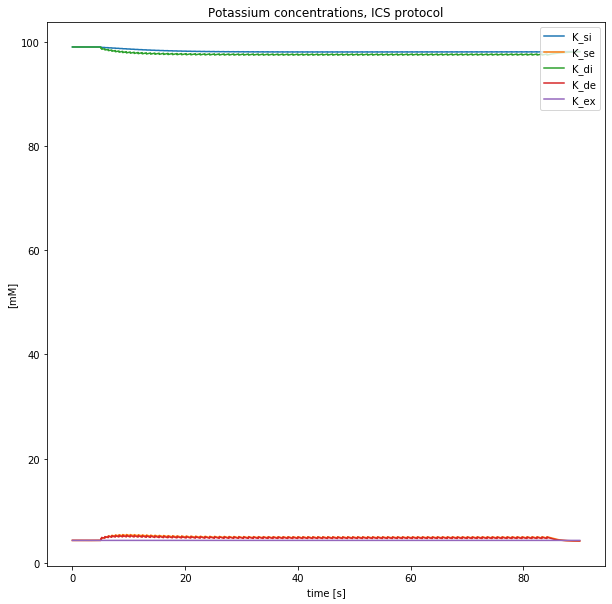

In [4]:
plt.figure(figsize=(10,10))
plt.plot(t, my_cell.K_si, '-', label='K_si')
plt.plot(t, my_cell.K_se, '-', label='K_se')
plt.plot(t, my_cell.K_di, '-', label='K_di')
plt.plot(t, my_cell.K_de, '-', label='K_de')
plt.plot(t, my_cell.K_ex, '-', label='K_ex')
plt.title('Potassium concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='upper right')

plt.show()


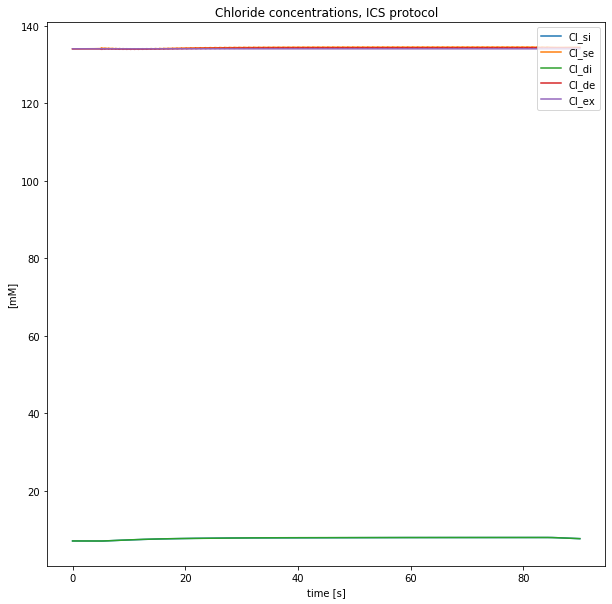

In [5]:
plt.figure(figsize=(10,10))
plt.plot(t, my_cell.Cl_si, '-', label='Cl_si')
plt.plot(t, my_cell.Cl_se, '-', label='Cl_se')
plt.plot(t, my_cell.Cl_di, '-', label='Cl_di')
plt.plot(t, my_cell.Cl_de, '-', label='Cl_de')
plt.plot(t, my_cell.Cl_ex, '-', label='Cl_ex')
plt.title('Chloride concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='upper right')

plt.show()

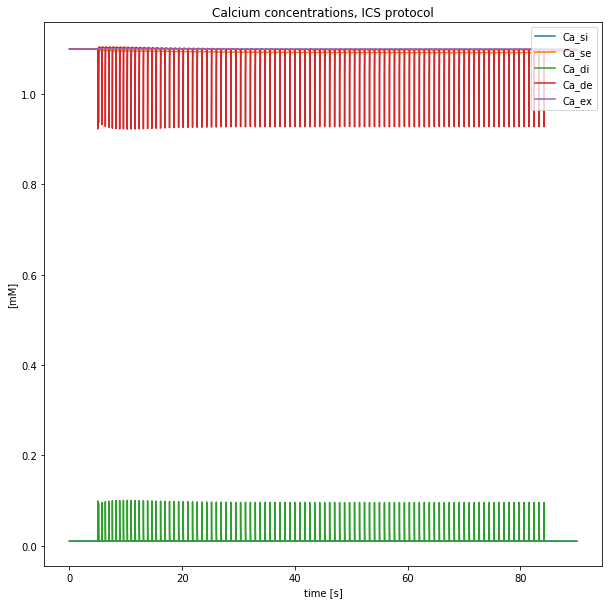

In [6]:
plt.figure(figsize=(10,10))
plt.plot(t, my_cell.Ca_si, '-', label='Ca_si')
plt.plot(t, my_cell.Ca_se, '-', label='Ca_se')
plt.plot(t, my_cell.Ca_di, '-', label='Ca_di')
plt.plot(t, my_cell.Ca_de, '-', label='Ca_de')
plt.plot(t, my_cell.Ca_ex, '-', label='Ca_ex')
plt.title('Calcium concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='upper right')

plt.show()

No handles with labels found to put in legend.


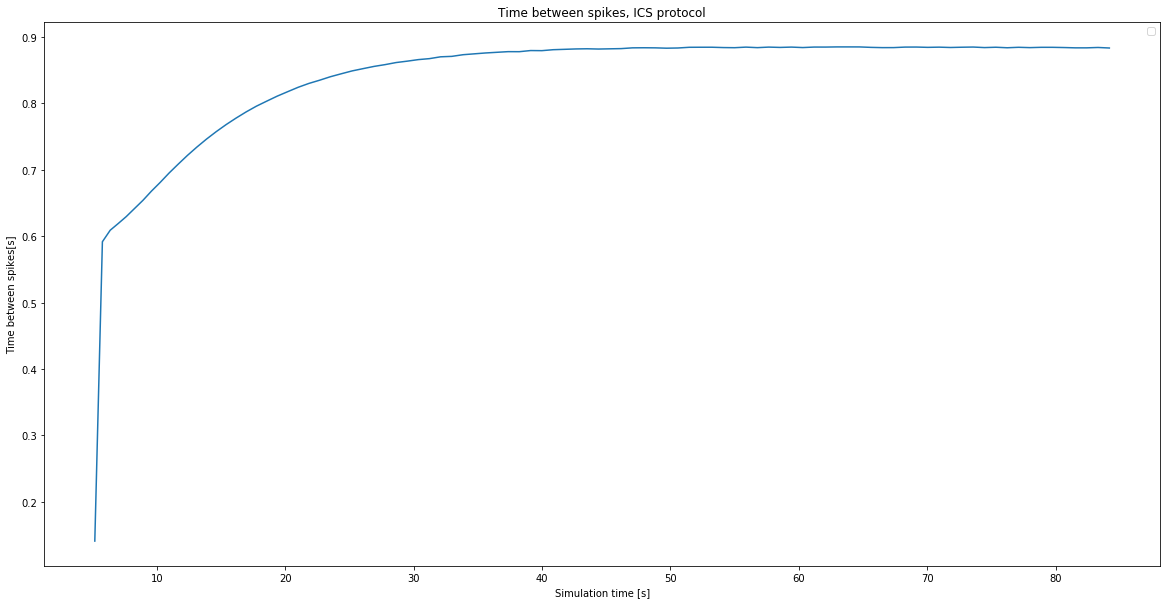

In [7]:
spikes, _ = find_peaks(phi_sm, height=0)

spike_times = list()
for spike in spikes:
    spike_times.append(t[spike])
    
time_between_spikes = [0]
for spike_nr in range(1, len(spike_times)):
    time_between_spikes.append(spike_times[spike_nr] - spike_times[spike_nr - 1])
    
spike_times_to_time_between_spikes = dict()
n = 0
for spike in spikes:
    spike_times_to_time_between_spikes[t[spike]] = time_between_spikes[n]
    n += 1
    
del spike_times_to_time_between_spikes[t[spikes[0]]]

plt.figure(figsize=(20,10))
plt.plot(list(spike_times_to_time_between_spikes.keys()), list(spike_times_to_time_between_spikes.values()))
plt.title('Time between spikes, ICS protocol')
plt.xlabel('Simulation time [s]')
plt.ylabel('Time between spikes[s]')
plt.legend(loc='upper right')

plt.show()

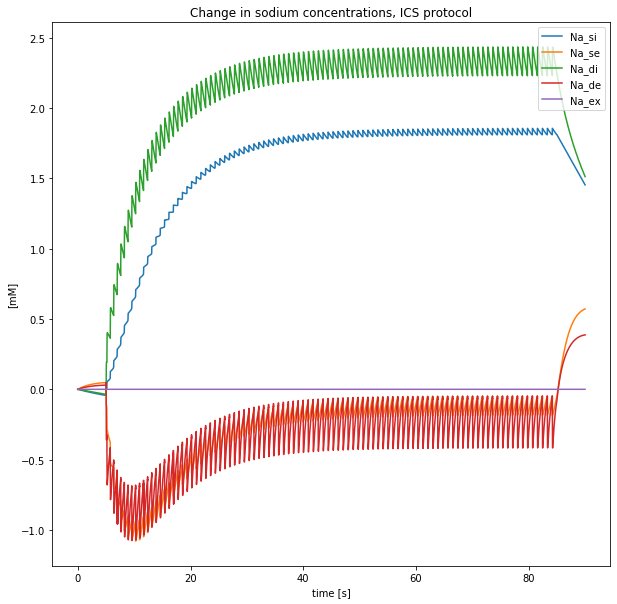

In [8]:
plt.figure(figsize=(10,10))
plt.plot(t, my_cell.Na_si - my_cell.Na_si[0], '-', label='Na_si')
plt.plot(t, my_cell.Na_se - my_cell.Na_se[0], '-', label='Na_se')
plt.plot(t, my_cell.Na_di - my_cell.Na_di[0], '-', label='Na_di')
plt.plot(t, my_cell.Na_de - my_cell.Na_de[0], '-', label='Na_de')
plt.plot(t, my_cell.Na_ex - my_cell.Na_ex[0], '-', label='Na_ex')
plt.title('Change in sodium concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='upper right')

plt.show()

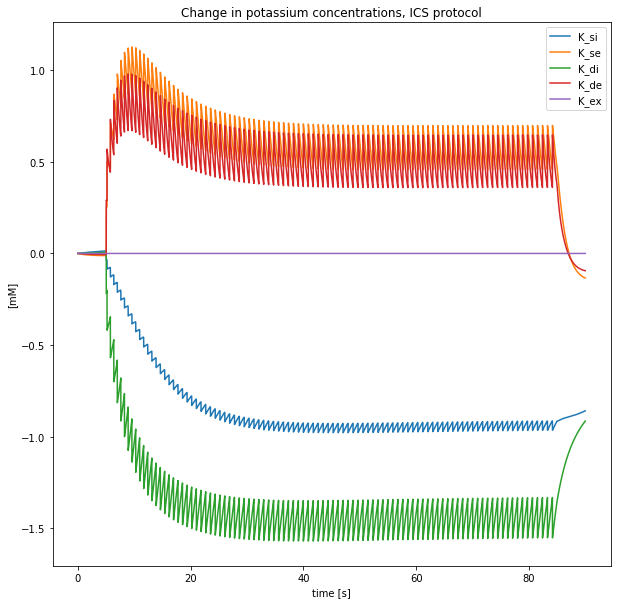

In [9]:
plt.figure(figsize=(10,10))
plt.plot(t, my_cell.K_si - my_cell.K_si[0], '-', label='K_si')
plt.plot(t, my_cell.K_se - my_cell.K_se[0], '-', label='K_se')
plt.plot(t, my_cell.K_di - my_cell.K_di[0], '-', label='K_di')
plt.plot(t, my_cell.K_de - my_cell.K_de[0], '-', label='K_de')
plt.plot(t, my_cell.K_ex - my_cell.K_ex[0], '-', label='K_ex')
plt.title('Change in potassium concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='upper right')

plt.show()

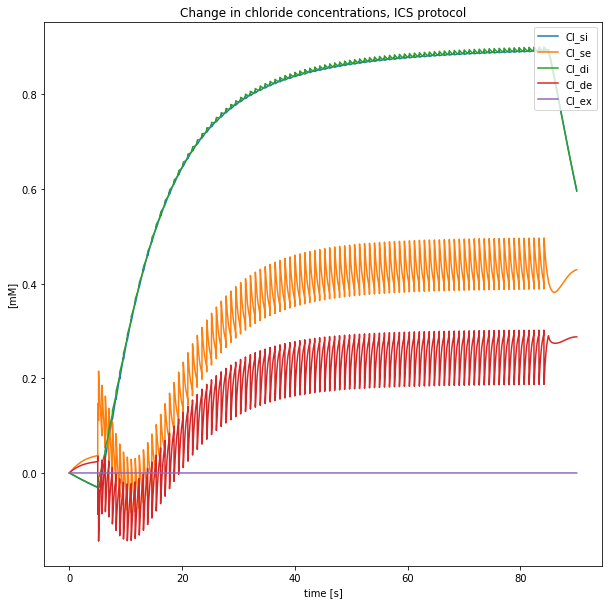

In [10]:
plt.figure(figsize=(10,10))
plt.plot(t, my_cell.Cl_si - my_cell.Cl_si[0], '-', label='Cl_si')
plt.plot(t, my_cell.Cl_se - my_cell.Cl_se[0], '-', label='Cl_se')
plt.plot(t, my_cell.Cl_di - my_cell.Cl_di[0], '-', label='Cl_di')
plt.plot(t, my_cell.Cl_de - my_cell.Cl_de[0], '-', label='Cl_de')
plt.plot(t, my_cell.Cl_ex - my_cell.Cl_ex[0], '-', label='Cl_ex')
plt.title('Change in chloride concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='upper right')

plt.show()

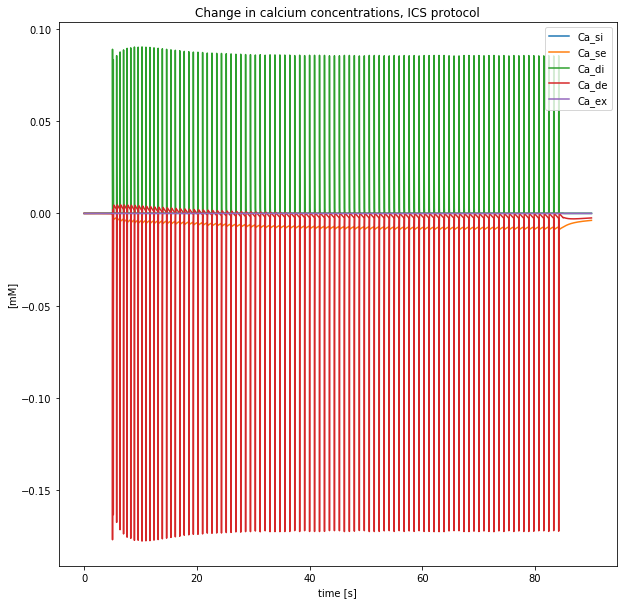

In [11]:
plt.figure(figsize=(10,10))
plt.plot(t, my_cell.Ca_si - my_cell.Ca_si[0], '-', label='Ca_si')
plt.plot(t, my_cell.Ca_se - my_cell.Ca_se[0], '-', label='Ca_se')
plt.plot(t, my_cell.Ca_di - my_cell.Ca_di[0], '-', label='Ca_di')
plt.plot(t, my_cell.Ca_de - my_cell.Ca_de[0], '-', label='Ca_de')
plt.plot(t, my_cell.Ca_ex - my_cell.Ca_ex[0], '-', label='Ca_ex')
plt.title('Change in calcium concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='upper right')

plt.show()

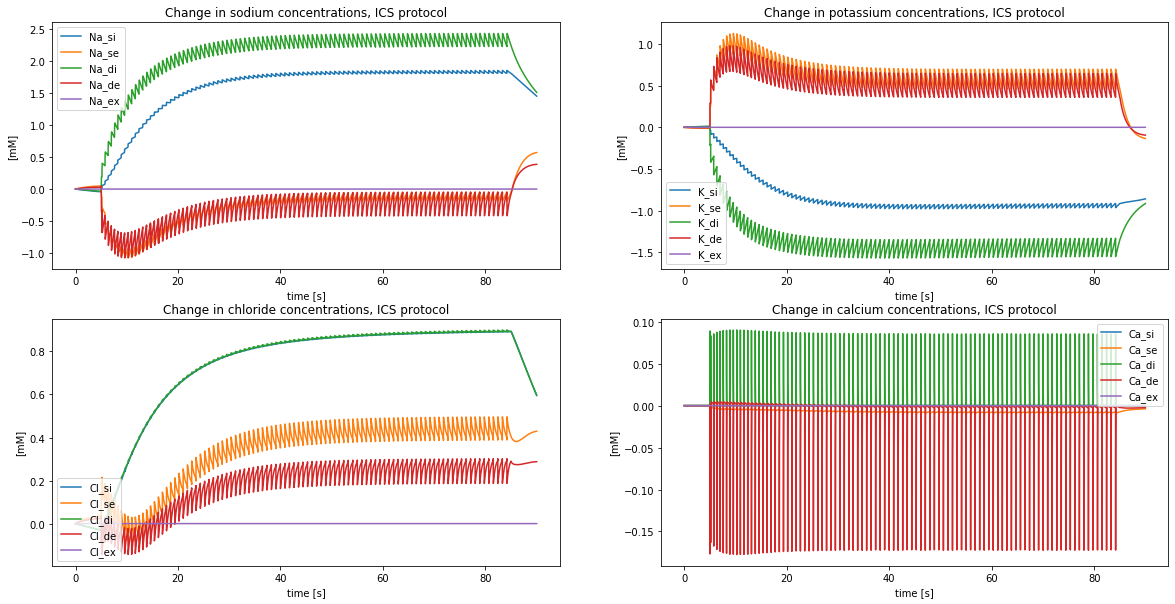

In [12]:
rows = 2
columns = 2
fig = plt.figure(figsize=(20,10))
fig.add_subplot(rows, columns, 1)
plt.plot(t, my_cell.Na_si - my_cell.Na_si[0], '-', label='Na_si')
plt.plot(t, my_cell.Na_se - my_cell.Na_se[0], '-', label='Na_se')
plt.plot(t, my_cell.Na_di - my_cell.Na_di[0], '-', label='Na_di')
plt.plot(t, my_cell.Na_de - my_cell.Na_de[0], '-', label='Na_de')
plt.plot(t, my_cell.Na_ex - my_cell.Na_ex[0], '-', label='Na_ex')
plt.title('Change in sodium concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='upper left')


fig.add_subplot(rows, columns, 2)
plt.plot(t, my_cell.K_si - my_cell.K_si[0], '-', label='K_si')
plt.plot(t, my_cell.K_se - my_cell.K_se[0], '-', label='K_se')
plt.plot(t, my_cell.K_di - my_cell.K_di[0], '-', label='K_di')
plt.plot(t, my_cell.K_de - my_cell.K_de[0], '-', label='K_de')
plt.plot(t, my_cell.K_ex - my_cell.K_ex[0], '-', label='K_ex')
plt.title('Change in potassium concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='lower left')

fig.add_subplot(rows, columns, 3)
plt.plot(t, my_cell.Cl_si - my_cell.Cl_si[0], '-', label='Cl_si')
plt.plot(t, my_cell.Cl_se - my_cell.Cl_se[0], '-', label='Cl_se')
plt.plot(t, my_cell.Cl_di - my_cell.Cl_di[0], '-', label='Cl_di')
plt.plot(t, my_cell.Cl_de - my_cell.Cl_de[0], '-', label='Cl_de')
plt.plot(t, my_cell.Cl_ex - my_cell.Cl_ex[0], '-', label='Cl_ex')
plt.title('Change in chloride concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='lower left')

fig.add_subplot(rows, columns, 4)
plt.plot(t, my_cell.Ca_si - my_cell.Ca_si[0], '-', label='Ca_si')
plt.plot(t, my_cell.Ca_se - my_cell.Ca_se[0], '-', label='Ca_se')
plt.plot(t, my_cell.Ca_di - my_cell.Ca_di[0], '-', label='Ca_di')
plt.plot(t, my_cell.Ca_de - my_cell.Ca_de[0], '-', label='Ca_de')
plt.plot(t, my_cell.Ca_ex - my_cell.Ca_ex[0], '-', label='Ca_ex')
plt.title('Change in calcium concentrations, ICS protocol')
plt.xlabel('time [s]')
plt.ylabel('[mM]')
plt.legend(loc='upper right')

plt.show()